In [29]:
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from datasets import *

**Disclaimer**

- Applying the masks only work when the masks and the actual images are in the same order alphabetically in their respective folders. This is achieved by the image and the corresponding mask having the same file name (except some stuff at the end like '_RGB')

In [22]:

# For now these only apply for the HSI data, but eventually we will only need that
TRAIN_FOLDER = "../Data/HDF5_FILES/train"
MASK_FOLDER = "../Data/MASKS/train"
BATCH_SIZE = 2
MASK_METHOD = 1    # 0 for only leaf, 1 for leaf+stem

In [23]:
# Compose transformation
# - TODO: Research and add relevant transformations (data augemntations), below are just a few examples
train_transforms = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(20),
    # transforms.Resize((256, 256)),    # Don't quite know how this works for HSI data - maybe TODO: research, test it
])

DataLoader for RGB images

In [24]:
# Create Dataset and DataLoader
dataset_train_FX10 = RgbDataset("../Data/RGB/FX10/train", "../Data/MASKS/FX10/train", transform=train_transforms, apply_mask=True, mask_method=1)
dataloader_train_FX10 = DataLoader(dataset_train_FX10, batch_size=6, shuffle=True, collate_fn=padded_collate)

In [15]:
# iter(dataloader_train).__next__()[0].shape

In [ ]:
for batch in dataloader_train_FX10:
    print(batch.shape)    # batch size * channels * height * width

torch.Size([6, 3, 814, 1192])


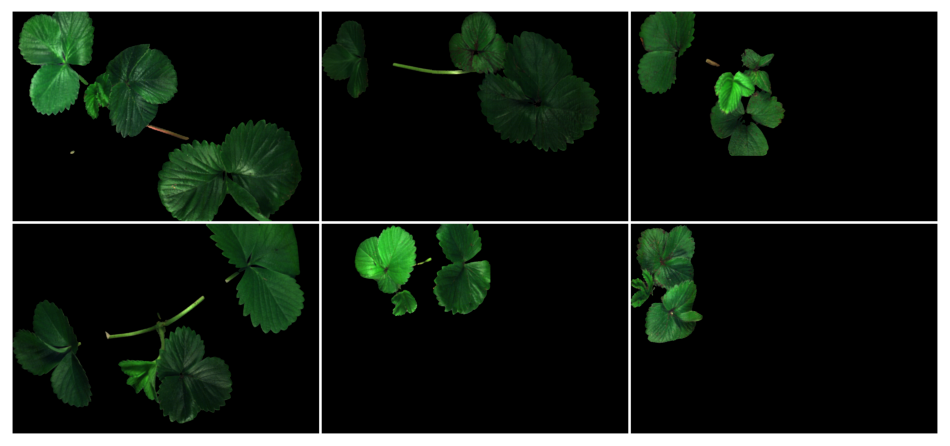

In [25]:
# Plot images in batch
batch = next(iter(dataloader_train_FX10))
grid = torchvision.utils.make_grid(batch, nrow=3, padding=10, pad_value=1)
plt.figure(figsize=(12,9))
plt.imshow(grid.permute(1,2,0))
plt.axis("off")

print(batch.shape)

DataLoader for HSI Data

In [26]:
# Create Dataset and DataLoader
dataset_train_hsi = HsiDataset(TRAIN_FOLDER, MASK_FOLDER, transform=train_transforms, apply_mask=True, mask_method=MASK_METHOD)
dataloader_train_hsi = DataLoader(dataset_train_hsi, batch_size=BATCH_SIZE, shuffle=True, collate_fn=padded_collate)

In [27]:
for batch in dataloader_train_hsi:
    print(batch.shape)    # batch size * channels * height * width

torch.Size([2, 224, 857, 1021])
torch.Size([2, 224, 1024, 1654])


torch.Size([2, 224, 857, 1315])


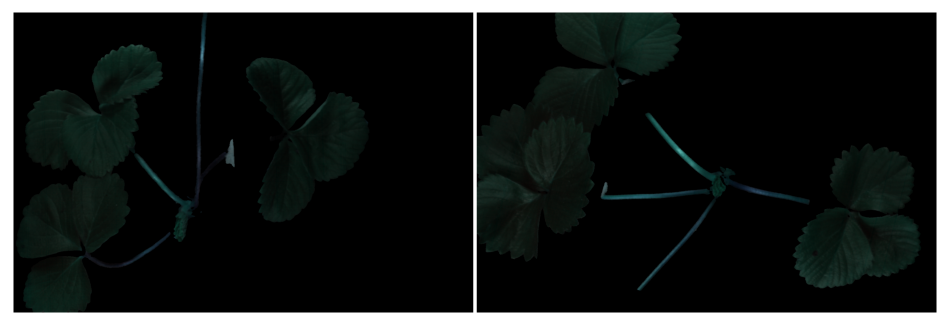

In [28]:
# Plot images in batch
RGB_bands = np.array([18, 52, 67])

batch = next(iter(dataloader_train_hsi))
grid = torchvision.utils.make_grid(batch[:,RGB_bands,:,], nrow=3, padding=10, pad_value=1)
plt.figure(figsize=(12,9))
plt.imshow(grid.permute(1,2,0))
plt.axis("off")

print(batch.shape)

**TODOs**
- Specify transforms (data augmentations) - based on what really occurs in the data
- Autoencoder